<b>ML4.1 Диагностика и кривые обучения<br>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [4]:
X.shape

(569, 30)

In [5]:
y.shape

(569,)

2.	Выберите два первых признака. Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.

In [6]:
X_2d = X[:, :2]
X_2d.shape

(569, 2)

In [7]:
y.shape

(569,)

3.	Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.2, random_state=0)

4.	Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.

In [9]:
clf = SVC(C=0.01, kernel="rbf")
clf.fit(X_train, y_train)

print(f"Score (train): {clf.score(X_train, y_train)}")
print(f"Score (test): {clf.score(X_test, y_test)}")

Score (train): 0.6923076923076923
Score (test): 0.6666666666666666


5. Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):
<br>
<br>
a.	собрать больше объектов наблюдения<br>
b.	провести обучение на меньшем объеме данных<br>
c.	исключить часть признаков из модели<br>
d.	добавить новые признаки в модель<br>
e.	добавить полиномиальные признаки<br>
f.	попробовать более сложные модели<br>
g.	попробовать более простые модели<br>
h.	увеличить регуляризацию модели<br>
i.	уменьшить регуляризацию модели<br>

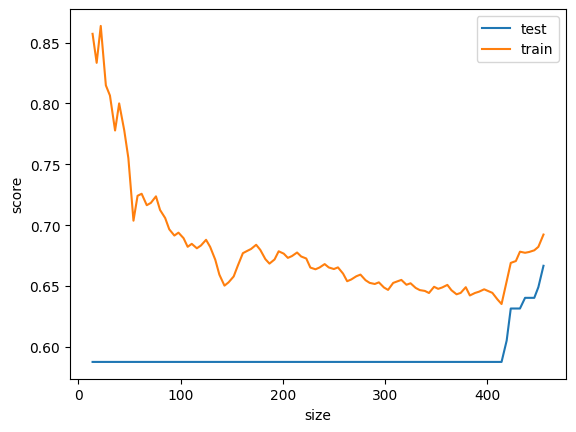

In [10]:
data = np.linspace(len(X_train) // 100 + 10, len(X_train), 100, dtype=int)
test_scores = []
train_scores = []

for i in data:
    clf = SVC(C=0.01, kernel='rbf')

    x_ = X_train[:i]
    y_ = y_train[:i]

    clf.fit(x_, y_)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(x_, y_))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('size')
ax.set_ylabel('score')
_ = ax.legend()

Модель недообучается 100%<br>
Точность модели маленькая + метрики train_score и test_score с ростом объема выборки увеличиваются.<br>

Что можно сделать:
1. увеличить выборку каким-либо способом
2. увеличить регуляризацию модели
3. попробовать другие, более сложные модели

6.	Проверьте выдвинутую гипотезу и попробуйте улучшить модель в соответствии с выбранными рекомендациями. Проверьте, увеличивается ли тестовая точность. Сделайте вывод.

In [11]:
clf = SVC(C=0.01, kernel="rbf")
clf.fit(X_train, y_train)

print(f"Score (test): {clf.score(X_test, y_test)}")
print(f"Score (train): {clf.score(X_train, y_train)}")

Score (test): 0.6666666666666666
Score (train): 0.6923076923076923


#### Увеличение регуляризации

Стивим С=100 

In [12]:
clf = SVC(kernel='rbf', C=100)
clf.fit(X_train, y_train)
print(f"Score (test): {clf.score(X_test, y_test)}")
print(f"Score (train): {clf.score(X_train, y_train)}")

Score (test): 0.868421052631579
Score (train): 0.9142857142857143


Увеличение регуляризации даёт увеличение точности модели, можно использовать

<b>Использование классификатора k-ближайших соседей</b>

In [13]:
import sklearn.neighbors as neigh

kn = neigh.KNeighborsClassifier(n_neighbors=90, n_jobs=6).fit(X_train,y_train)
print(f"Score (test): {kn.score(X_test, y_test)}")
print(f"Score (train): {kn.score(X_train, y_train)}")

Score (test): 0.8947368421052632
Score (train): 0.8879120879120879


Результаты по алгоритму k-ближайших соседей действительно выше, чем при SVC(C=0.01, kernel="rbf")

<b>Использование логистической регресси</b>

In [14]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=5000, n_jobs=6).fit(X_train, y_train)
print(f"Score (test): {logr.score(X_test, y_test)}")
print(f"Score (train): {logr.score(X_train, y_train)}")

Score (test): 0.8947368421052632
Score (train): 0.8989010989010989


Результаты по логистической регрессии также выше, чем при SVC(C=0.01, kernel="rbf")

7.	Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

0.8771929824561403

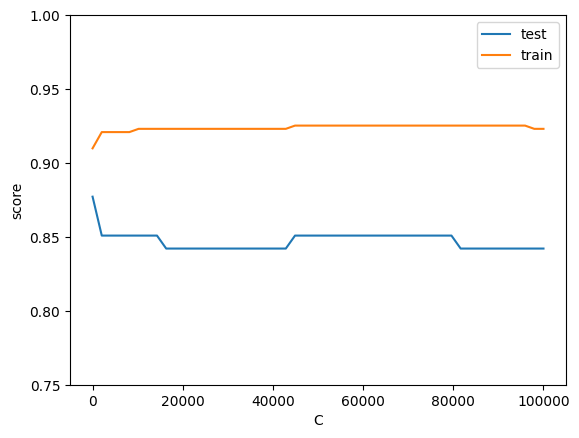

In [24]:

# from tqdm import tqdm

data = np.linspace(1, 100000, 50)

test_scores = []
train_scores = []

for i in data:
    clf = SVC(C=i, kernel="rbf")

    clf.fit(X_train, y_train)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(X_train, y_train))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('С')
ax.set_ylabel('score')
ax.set_ylim([0.75, 1])
ax.legend()

max(test_scores)

8.	Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.

0.8771929824561403

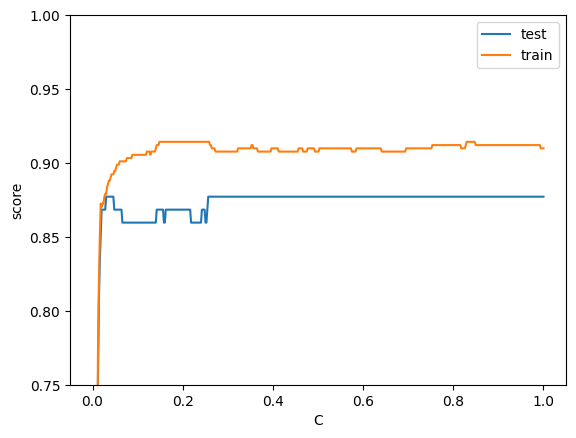

In [25]:
data = np.linspace(0.0001, 1, 500)

test_scores = []
train_scores = []

for i in data:
    clf = SVC(C=i, kernel="rbf")

    clf.fit(X_train, y_train)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(X_train, y_train))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('С')
ax.set_ylabel('score')
ax.set_ylim([0.75, 1])
ax.legend()

max(test_scores)

С большим значением C модель переобучается<br>
C малым - недообучается.<br>
<br>
С увеличением аргумента C точность модели на тренируемых данных увеличивается, а на тестовых - уменьшается.

9.	Найдите методом подбора оптимальное значение параметра регуляризации (примерное).

In [26]:
clf = SVC(kernel='rbf', C=51.1)
clf.fit(X_train, y_train)
print(f'test accuracy: {clf.score(X_test, y_test)}')
print(f'train accuracy: {clf.score(X_train, y_train)}')

test accuracy: 0.8771929824561403
train accuracy: 0.9164835164835164


In [27]:
results = []
for i in range(1,1000):
    value = i * 0.1
    clf = SVC(kernel='rbf', C=value)
    clf.fit(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    train_acc = clf.score(X_train, y_train)
    results.append((value, test_acc, train_acc))
    
results.sort(key=lambda x: x[1])
print(results[-1])

(51.1, 0.8771929824561403, 0.9164835164835164)


При C = 5 получаем 87% на тестовой выборке и 90% на тренировочной, что очень хорошо<br>
Если перебрать, то<br>
При С = 51.1 получаем 87.7% и 91.6%<br>

10.	Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.

График зависимости тестовой и обучающей точности от значения регуляризационного параметра.

0.8947368421052632

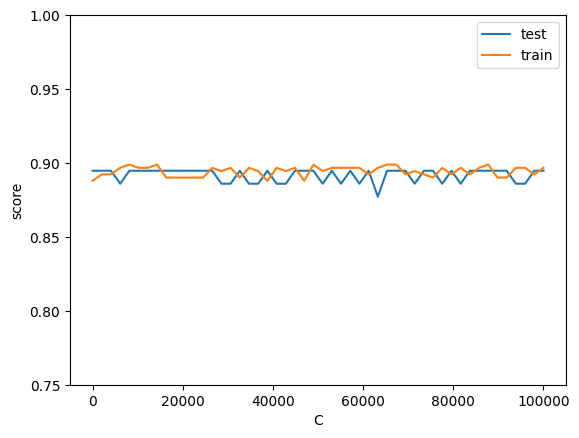

In [28]:
data = np.linspace(1, 100000, 50)

test_scores = []
train_scores = []

for i in data:
    clf = SVC(C=i, kernel="linear")

    clf.fit(X_train, y_train)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(X_train, y_train))

ax = plt.axes()
ax.plot(data, test_scores, label="test")
ax.plot(data, train_scores, label="train")
ax.set_xlabel('С')
ax.set_ylabel('score')
ax.set_ylim([0.75, 1])
ax.legend()

max(test_scores)

Найти методом подбора оптимальное значение параметра регуляризации

In [29]:
clf = SVC(kernel='linear', C=9.9)
clf.fit(X_train, y_train)
print(f'test accuracy: {clf.score(X_test, y_test)}')
print(f'train accuracy: {clf.score(X_train, y_train)}')

test accuracy: 0.8947368421052632
train accuracy: 0.8879120879120879


In [30]:
results = []
for i in range(1,100):
    value = i * 0.1
    clf = SVC(kernel='linear', C=value)
    clf.fit(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    train_acc = clf.score(X_train, y_train)
    results.append((value, test_acc, train_acc))
    
results.sort(key=lambda x: x[2])
print(results[-1])

(9.9, 0.8947368421052632, 0.8879120879120879)


### Вывод
Модели примерно одинаковые, каких-либо супер особенностей для выбора конкретной мной не выявлено